In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv('/home/intellact/Downloads/Random_Forest_clas/fruit_classification_dataset.csv')
df.head()


,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [4]:
df.isnull().sum()


size (cm)        0
shape            0
weight (g)       0
avg_price (₹)    0
color            0
taste            0
fruit_name       0
dtype: int64

In [6]:
df.shape


(10000, 7)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [8]:
df.describe()


,size (cm),weight (g),avg_price (₹)
count,10000.000000,10000.000000,10000.000000
mean,8.430600,455.457720,77.016720
std,6.396915,731.643087,38.946916
min,0.900000,4.500000,9.000000
25%,3.700000,45.800000,45.575000
50%,7.200000,168.800000,75.400000
75%,10.100000,365.275000,100.700000
max,27.500000,3299.800000,165.000000


In [10]:
print(df.columns)


Index(['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste',
       'fruit_name'],
      dtype='object')


In [11]:
X = df.drop('fruit_name', axis=1)  # Features
y = df['fruit_name']               # Target


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
# Identify categorical columns
categorical_cols = ['shape', 'color', 'taste']

# One-hot encode them
X = pd.get_dummies(X, columns=categorical_cols)


In [24]:
from sklearn.preprocessing import LabelEncoder
import pickle

le = LabelEncoder()
y = le.fit_transform(df['fruit_name'])

# Save the encoder
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

# Train your model as usual
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [19]:
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       116
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00       115
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00       107
          11       1.00      1.00      1.00        87
          12       1.00      1.00      1.00        89
          13       1.00      1.00      1.00        96
          14       1.00      1.00      1.00       106
          15       1.00      1.00      1.00        93
          16       1.00      1.00      1.00       104
          17       1.00    

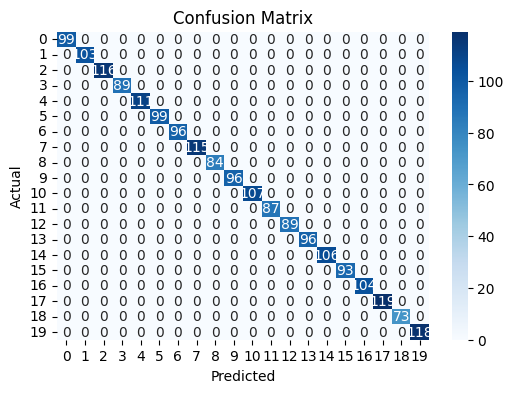

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
